<a href="https://colab.research.google.com/github/TamerKaratekin/healthcare/blob/main/interactive_roi_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cell 1: Create the Python File**

In [1]:
%%writefile roi_app.py

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Page Configuration
st.set_page_config(page_title="Hospital ROI Simulator", page_icon="🏥")

st.title("🏥 Readmission Cost & ROI Simulator")
st.markdown("""
**Product Manager Prototype**
This tool models the financial impact of implementing a digital follow-up intervention
for high-risk heart failure patients.
""")

# 2. Sidebar Controls
st.sidebar.header("Model Parameters")
num_patients = st.sidebar.slider("Annual Patient Volume", 500, 5000, 1000)
readmission_rate = st.sidebar.slider("Current Readmission Rate (%)", 10.0, 30.0, 18.5) / 100
penalty_cost = st.sidebar.number_input("Avg. CMS Penalty Cost ($)", 10000, 25000, 15000)

st.sidebar.markdown("---")
st.sidebar.subheader("Product Impact")
intervention_success = st.sidebar.slider("Est. Reduction in Readmissions (%)", 5, 50, 20) / 100
software_cost = st.sidebar.number_input("Annual SaaS Cost ($)", 10000, 100000, 50000)

# 3. The Math
current_readmissions = int(num_patients * readmission_rate)
current_cost = current_readmissions * penalty_cost
prevented_cases = int(current_readmissions * intervention_success)
savings = prevented_cases * penalty_cost
net_roi = savings - software_cost

# 4. The Dashboard
col1, col2, col3 = st.columns(3)
col1.metric("Current Annual Waste", f"${current_cost:,.0f}")
col2.metric("Proj. Gross Savings", f"${savings:,.0f}", delta=f"{prevented_cases} patients saved")
col3.metric("Net ROI (1-Year)", f"${net_roi:,.0f}", delta_color="normal")

# Visualization
fig, ax = plt.subplots(figsize=(10, 5))
scenarios = ['Status Quo', 'With Intervention']
costs = [current_cost, current_cost - savings + software_cost]
bars = ax.bar(scenarios, costs, color=['#ff9999', '#66b3ff'])
ax.set_ylabel('Total Operational Cost ($)')
ax.set_title('Financial Impact Analysis')
ax.bar_label(bars, fmt='${:,.0f}')
st.pyplot(fig)

# 5. Recommendation
if net_roi > 0:
    st.success(f"✅ Recommendation: **LAUNCH**. Project yields a positive return of ${net_roi:,.0f}.")
else:
    st.error(f"❌ Recommendation: **HOLD**. Operational costs exceed savings by ${abs(net_roi):,.0f}.")

Writing roi_app.py


**Cell 2: Run the Server (The Tunnel)**

In [3]:
# Cell 2: Run the Server using Cloudflare (More Stable)
import time

# 1. Install Streamlit (if not already installed)
!pip install -q streamlit

# 2. Run the Streamlit App in the background on Port 8501
print("🚀 Starting Streamlit in the background...")
get_ipython().system_raw('streamlit run roi_app.py &')

# 3. Download & Run Cloudflare Tunnel
# This creates a public link to your Colab without needing passwords
print("🔗 Creating Tunnel...")
!wget -q -nc https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64
!./cloudflared-linux-amd64 tunnel --url http://localhost:8501

🚀 Starting Streamlit in the background...
🔗 Creating Tunnel...
2025-12-10T04:19:12Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2025-12-10T04:19:12Z INF Requesting new quick Tunnel on trycloudflare.com...
2025-12-10T04:19:16Z INF +--------------------------------------------------------------------------------------------+
2025-12-10T04:19:16Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2025-12-10T04:19:1

Screenshot of the interactive app running on Cloudflare
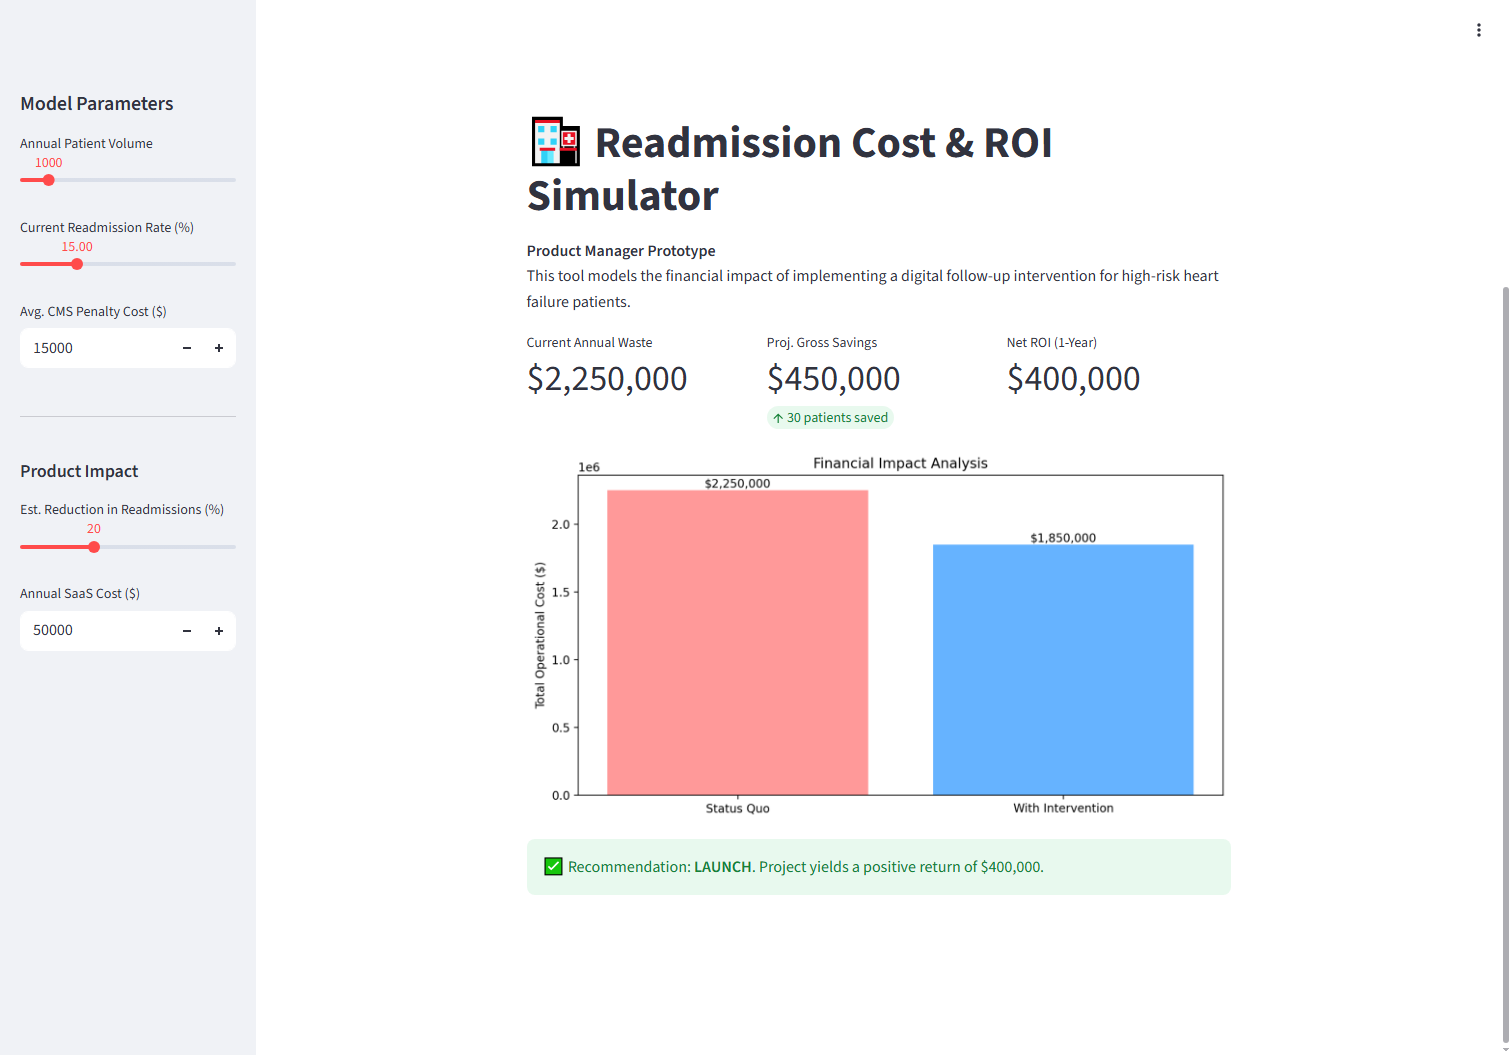